In [1]:
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Load Data 

In [2]:
# Load Yelp reviews data
biz_f = open('data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()
biz_df.head()

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,rncjoVoEFUJGCUoC1JgnUA,"[Accountants, Professional Services, Tax Servi...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,5.0,AZ,business
1,0FNFSzCFP_rGUoJx8W7tJg,"[Sporting Goods, Bikes, Shopping]",Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",33.604054,-112.105933,Bike Doctor,[],True,5,5.0,AZ,business
2,3f_lyB6vFK48ukH6ScvLHg,[],Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",33.460526,-112.073933,Valley Permaculture Alliance,[],True,4,5.0,AZ,business
3,usAsSV36QmUej8--yvN-dg,"[Food, Grocery]",Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",33.392210,-112.085377,Food City,[],True,5,3.5,AZ,business
4,PzOqRohWw7F7YEPBz6AubA,"[Food, Bagels, Delis, Restaurants]",Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",33.712797,-112.200264,Hot Bagels & Deli,[],True,14,3.5,AZ,business


In [4]:
# Load Yelp reviews data
review_file = open('data/yelp_academic_dataset_review.json')
review_df = pd.DataFrame([json.loads(x) for x in review_file.readlines()])
review_file.close()
review_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'useful': 5, 'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'useful': 1, 'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{'funny': 0, 'useful': 2, 'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{'funny': 0, 'useful': 0, 'cool': 0}"


### Data Exploraion

In [5]:
biz_df.columns, review_df.columns

(Index(['business_id', 'categories', 'city', 'full_address', 'latitude',
        'longitude', 'name', 'neighborhoods', 'open', 'review_count', 'stars',
        'state', 'type'],
       dtype='object'),
 Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
        'votes'],
       dtype='object'))

In [6]:
biz_df['categories']

0        [Accountants, Professional Services, Tax Servi...
1                        [Sporting Goods, Bikes, Shopping]
2                                                       []
3                                          [Food, Grocery]
4                       [Food, Bagels, Delis, Restaurants]
5                    [Women's Clothing, Fashion, Shopping]
6        [Music & DVDs, Books, Mags, Music & Video, Vin...
7        [Event Planning & Services, Venues & Event Spa...
8        [Art Schools, Specialty Schools, Shopping, Jew...
9                                [Sandwiches, Restaurants]
10       [Music & DVDs, Books, Mags, Music & Video, Mus...
11                                  [Mexican, Restaurants]
12                                         [Food, Grocery]
13                                    [Pizza, Restaurants]
14       [Hotels & Travel, Event Planning & Services, H...
15                  [Department Stores, Fashion, Shopping]
16                         [Window Washing, Home Service

In [8]:
# Pull out only Nightlife, Restaurants, Food & Mexican businesses
four_biz = biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories'] or
'Restaurants' in x['categories'] or 'Food' in x['categories'] or 'Shopping' in x['categories'], axis=1)]

# Join with the reviews to get all reviews on the four types of business
four_biz_reviews = four_biz.merge(review_df, on='business_id', how='inner')

# Trim away the features we won't use
four_biz_reviews = four_biz_reviews[['business_id',
                                    'text',
                                    'categories']]


### Numeric representation of categories

In [9]:
####    Function for numeric representation of caegories
def num_representation(categories):
    if "Nightlife" in categories:
        return '1'
    elif "Restaurants" in categories:
        return '2'
    elif "Food" in categories:
        return '3'
    elif "Shopping" in categories:
        return '4'
four_biz_reviews['target'] = four_biz_reviews.apply(lambda x: num_representation(x['categories']), axis=1)

In [10]:
print(four_biz_reviews.target.value_counts())

2    135902
1     30136
3     19827
4     12360
Name: target, dtype: int64


In [39]:
four_biz_reviews[four_biz_reviews['target'] == '1'].head()

,business_id,text,categories,target
196,QL3vFMAsEHqfi1KGH-4igg,The place was pretty empty - even for an off n...,"[Bars, Nightlife, Lounges]",1
197,QL3vFMAsEHqfi1KGH-4igg,"Ugh, this place was so cheesy. It's like they ...","[Bars, Nightlife, Lounges]",1
198,QL3vFMAsEHqfi1KGH-4igg,Red Bar was perfect for a pre-dinner and post-...,"[Bars, Nightlife, Lounges]",1
199,QL3vFMAsEHqfi1KGH-4igg,I went here for a birthday party on Saturday a...,"[Bars, Nightlife, Lounges]",1
200,QL3vFMAsEHqfi1KGH-4igg,I've only been living in the Phoenix area for ...,"[Bars, Nightlife, Lounges]",1


In [12]:
four_biz_reviews.shape

(198225, 4)

### Handling Imbalance Data

In [13]:
nightlife = four_biz_reviews[four_biz_reviews.apply(lambda x: 'Nightlife' in x['categories'], axis=1)]
restaurants = four_biz_reviews[four_biz_reviews.apply(lambda x: 'Restaurants' in x['categories'], axis=1)]
food = four_biz_reviews[four_biz_reviews.apply(lambda x: 'Food' in x['categories'], axis=1)]
shopping = four_biz_reviews[four_biz_reviews.apply(lambda x: 'Shopping' in x['categories'], axis=1)]
print(f'nightlife : {nightlife.shape} \nrestaurants : {restaurants.shape} \nfood : {food.shape} \nshopping : {shopping.shape}')

nightlife : (30136, 4) 
restaurants : (158430, 4) 
food : (33217, 4) 
shopping : (14335, 4)


In [27]:
# shopping
(14335*.9)

12901.5

In [28]:
# food
(14335*.9)/33217

0.38840051780714696

In [25]:
# restaurants
(14335*.9)/158430

0.08143344063624314

In [26]:
# nightlife
(14335*.9)/30136

0.4281092381205203

In [29]:
# Avoiding Data Imbalance
shopping_subset = shopping.sample(frac=.9, random_state=123)
food_subset = food.sample(frac=0.388, random_state=123)
nightlife_subset = nightlife.sample(frac=0.428, random_state=123)
restaurant_subset = restaurants.sample(frac=0.081, random_state=123)

print(shopping_subset.shape, food_subset.shape, nightlife_subset.shape, restaurant_subset.shape)
combined = pd.concat([shopping_subset, food_subset, nightlife_subset, restaurant_subset])
combined.shape

(12902, 4) (12888, 4) (12898, 4) (12833, 4)


(51521, 4)

### Data Split

In [30]:
from sklearn.model_selection import train_test_split

# Split into training and test datasets
training_data, test_data = train_test_split(combined, train_size=0.7, random_state=123)
training_data.shape, test_data.shape

((36064, 4), (15457, 4))

### Data Representation

In [31]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
# Represent the review text as a bag-of-words
bow_transform = CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])
X_te_bow = bow_transform.transform(test_data['text'])

print(len(bow_transform.vocabulary_))

# target data
y_tr = training_data['target']
y_te = test_data['target']


# Create the tf-idf representation using the bag-of-words matrix
tfidf_trfm = TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

50314


In [33]:
import sklearn.metrics as sm
from sklearn.neighbors import KNeighborsClassifier

### BOW

In [34]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr_bow, y_tr)
    pred_i = knn.predict(X_te_bow)
    error.append(np.mean(pred_i != y_te))

error = [0.5559940480041405,0.5890535032671281,0.5735912531539108,0.5721679497962089,0.5686743870091221,0.568415604580449,
0.563434042828492,0.5584524810765349,0.5616872614349485,0.5589700459338811,0.5582583942550301,0.5536003105389145,0.5532121368959048,
 0.5536003105389145,0.5466778805719091,0.5491363136443036,0.5473895322507601,0.5499126609303229,0.5494597916801449]

Text(0, 0.5, 'Mean Error')

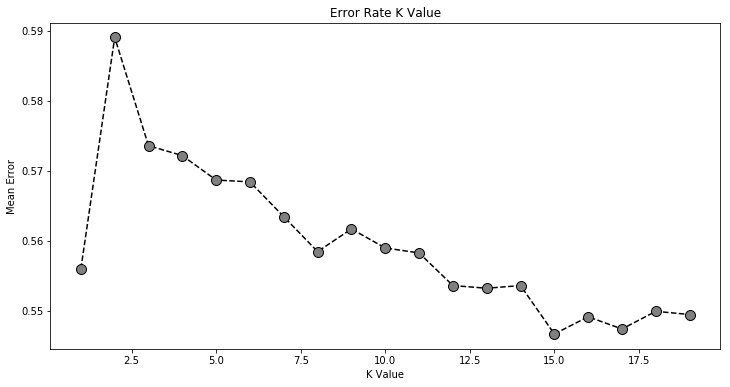

In [40]:
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

## error is declared here incase it takes time to execute previous snippet
#error = [0.5559940480041405,0.5890535032671281,0.5735912531539108,0.5721679497962089,0.5686743870091221,0.568415604580449, 0.563434042828492,0.5584524810765349,0.5616872614349485,0.5589700459338811,0.5582583942550301,0.5536003105389145,0.5532121368959048, 0.5536003105389145,0.5466778805719091,0.5491363136443036,0.5473895322507601,0.5499126609303229,0.5494597916801449]

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Ploting of "error" for BOW
#### Considering (Nightlife * 0.428), (Restaurants * 0.081), (Food * 0.388) & (Shopping * 0.9) accordingly
<img src="error_bow.png">

### BOW for K=3 

In [42]:
# BOW for K=3, 
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_tr_bow, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
y_bow_pred = classifier.predict(X_te_bow)


In [44]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_te, y_bow_pred))
print(classification_report(y_te, y_bow_pred))

[[2805 1587  201  163]
 [1994 2291  286  154]
 [1076  796  585  267]
 [1208  775  359  910]]
              precision    recall  f1-score   support

           1       0.40      0.59      0.47      4756
           2       0.42      0.48      0.45      4725
           3       0.41      0.21      0.28      2724
           4       0.61      0.28      0.38      3252

   micro avg       0.43      0.43      0.43     15457
   macro avg       0.46      0.39      0.40     15457
weighted avg       0.45      0.43      0.41     15457



### BOW for K=8

In [46]:
#BOW for K=8
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_tr_bow, y_tr)
y_bow_pred = classifier.predict(X_te_bow)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_te, y_bow_pred))
print(classification_report(y_te, y_bow_pred))

[[2731 1733  166  126]
 [1826 2501  242  156]
 [ 832  967  624  301]
 [ 988  813  482  969]]
              precision    recall  f1-score   support

           1       0.43      0.57      0.49      4756
           2       0.42      0.53      0.47      4725
           3       0.41      0.23      0.29      2724
           4       0.62      0.30      0.40      3252

   micro avg       0.44      0.44      0.44     15457
   macro avg       0.47      0.41      0.41     15457
weighted avg       0.46      0.44      0.43     15457



### TFIDF

In [ ]:
error_tfidf = []


for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr_tfidf, y_tr)
    pred_i = knn.predict(X_te_tfidf)
    error_tfidf.append(np.mean(pred_i != y_te))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_tfidf, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [26]:
classifier = KNeighborsClassifier(n_neighbors=38)
classifier.fit(X_tr_tfidf, y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=38, p=2,
           weights='uniform')

In [27]:
y_tfidf_pred = classifier.predict(X_te_tfidf)

In [28]:
print(confusion_matrix(y_te, y_tfidf_pred))
print(classification_report(y_te, y_tfidf_pred))

[[2362 2093   33    8]
 [ 962 3331  137    9]
 [ 390 1190  850  129]
 [ 462 1448  222  942]]
              precision    recall  f1-score   support

           1       0.57      0.53      0.54      4496
           2       0.41      0.75      0.53      4439
           3       0.68      0.33      0.45      2559
           4       0.87      0.31      0.45      3074

   micro avg       0.51      0.51      0.51     14568
   macro avg       0.63      0.48      0.49     14568
weighted avg       0.60      0.51      0.50     14568



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_te, y_bow_pred))
print(classification_report(y_te, y_bow_pred))